In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
cd ../tests

/Users/mitchallain/Development/Python/BeagleBone-excavator/tests


In [4]:
from trajectories import *
from sg_model import sg_model

In [5]:
print(sg_model)
print(sg_model[0]['subgoal_pos'], sg_model[1]['subgoal_pos'])

[{'subgoal': 1, 'npt': [3, 3, 1.5, 0.2], 'onpt': [], 'it': [3, 0.5], 'subgoal_pos': [9.868125000000001, 9.3768, 1.225, 1.1967504514768619]}, {'subgoal': 2, 'npt': [2, 2, 3, 0.2], 'onpt': [], 'it': [0, -0.5], 'subgoal_pos': [7.862608695652173, 6.1048484848484845, 1.2072916666666669, 1.200677442293849]}, {'subgoal': 3, 'npt': [3, 2, 1.5, 0.2], 'onpt': [], 'it': [1, 0.5], 'subgoal_pos': [7.828260869565217, 9.339200000000002, 9.471764705882354, 1.200677442293849]}, {'subgoal': 4, 'npt': [1.5, 2, 2, 0.2], 'onpt': [], 'it': [0, 0.5], 'subgoal_pos': [9.908750000000001, 9.3768, 9.442941176470589, 1.200677442293849]}, {'subgoal': 5, 'npt': [3, 3, 2, 0.2], 'onpt': [], 'it': [3, -0.5], 'subgoal_pos': [9.868125000000001, 9.3768, 9.442941176470589, 0.2974695543867835]}, {'subgoal': 6, 'npt': [3, 3, 1.5, 0.2], 'onpt': [], 'it': [2, -0.5], 'subgoal_pos': [9.8275, 9.339200000000002, 2.4115517241379307, 0.2974695543867835]}]
([9.868125000000001, 9.3768, 1.225, 1.1967504514768619], [7.862608695652173, 6

In [6]:
pi = sg_model[0]['subgoal_pos']
pf = sg_model[1]['subgoal_pos']
print pi, pf

[9.868125000000001, 9.3768, 1.225, 1.1967504514768619] [7.862608695652173, 6.1048484848484845, 1.2072916666666669, 1.200677442293849]


In [7]:
dur = duration(pi, pf, [18, 27, 30, 0.9], [20]*4)

In [8]:
print dur

1.38044264871


In [9]:
coeff = quintic_coeff(dur, pi, pf)

In [23]:
print coeff[0]

[  9.86812500e+00  -3.27515792e-15  -3.16413562e-15  -7.62379293e+00
   8.28407425e+00  -2.40041099e+00]


In [28]:
sine_func_vector = np.vectorize(sine_func)

tt = np.linspace(0, 3, 301)
p = np.zeros((301, 4))

for j in range(4):
    for i, t in enumerate(tt):
        if t > dur:
            t = dur
        p[i][j] = np.polyval(coeff[j][::-1], t)


In [29]:
len(p)

301

In [30]:
pt = p.transpose()

<IPython.core.display.Javascript object>


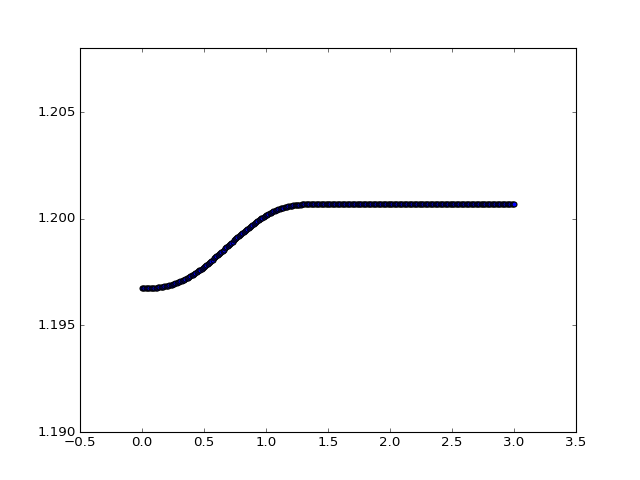

In [31]:
plt.scatter(tt, pt[3])
plt.show()

In [15]:
x_eef = [0]*len(p)
y_eef = [0]*len(p)
z_eef = [0]*len(p)

for i in range(len(p)):
    x_eef[i], y_eef[i], z_eef[i], _ = forward_kin(exc, p[i][3], p[i][1:4])

NameError: name 'exc' is not defined

<IPython.core.display.Javascript object>


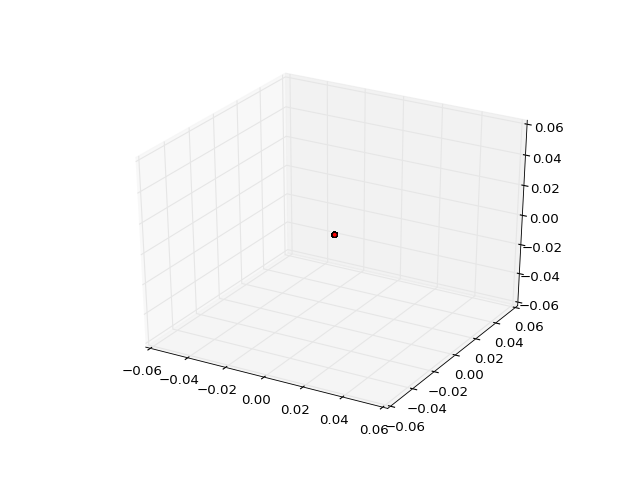

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_eef, y_eef, z_eef, zdir='y', c='r')